# Keras를 활용한 심층 신경망 실습 - Fashion_MNIST

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten 
from keras.layers import Dense
from tensorflow import keras
np.set_printoptions(suppress=True)

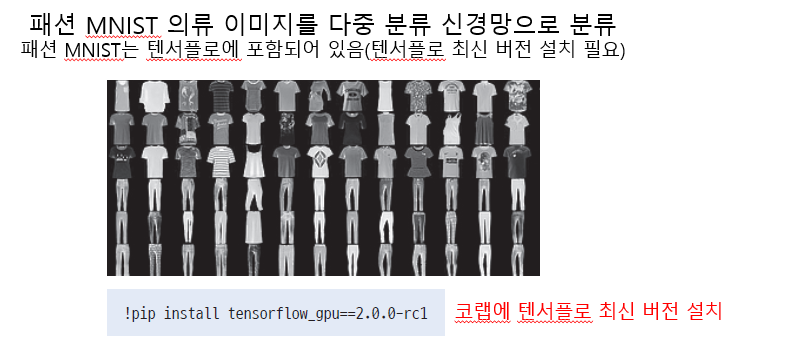

#### 데이터 탐색

In [2]:
X_train_np = np.loadtxt('./data/skyggle_Fashion_MNIST/X_train.txt')
y_train_np = np.loadtxt('./data/skyggle_Fashion_MNIST/y_train.txt').astype('int')
X_test_np = np.loadtxt('./data/skyggle_Fashion_MNIST/X_test.txt')

In [3]:
X_train_np.shape, y_train_np.shape, X_test_np.shape

((60000, 784), (60000,), (10000, 784))

In [4]:
import pandas as pd
pd.read_csv('./data/skyggle_Fashion_MNIST/submission.csv')

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


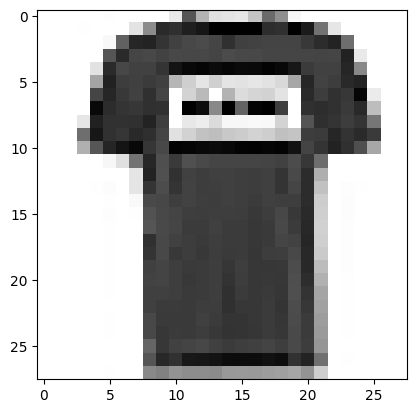

In [5]:
# 샘플 이미지 확인
# cmap의 기본값 'viridis' 짙은 녹색 ~ 밝은 노란색, cmap=gray, 0에 가까울수록 어둡다
plt.imshow(X_train_np[1].reshape(28, 28), cmap='Greys')

In [6]:
# 클래스(타겟)의 내용과 의미 확인하기
y_train_np[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [7]:
class_names = [
                    "T-shirt/top",
                    "Trouser",
                    "Pullover",
                    "Dress",
                    "Coat",
                    "Sandal",
                    "Shirt",
                    "Sneaker",
                    "Bag",
                    "Ankle boot",
                ]
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
# 타겟 분포 확인하기 : numpy.bincount() - 배열에 있는 정수값의 빈도를 세고, 정수에 해당하는 인덱스 위치에 저장함

pd.Series(y_train_np).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

#### 데이터 준비 : 분할, 정규화, 차원 변경

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_np, y_train_np, stratify=y_train_np, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_val.shape

((48000, 784), (12000, 784))

In [11]:
y_train.shape, y_val.shape

((48000,), (12000,))

In [12]:
# 데이터 정규화

X_train = X_train / 255
X_val = X_val / 255

y_train_encoded = to_categorical(y_train)

In [13]:
# 다중 분류 클래스인 y_train_np를 원핫 인코딩하지 않고 그대로 사용하되
# 최적화(compile)의 손실함수를 "sparse_categorical_crossentropy"를 사용함

####  인공 신경망 모형 구성

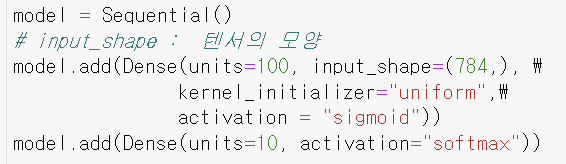

In [152]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=2000, input_shape=(784, ), activation='relu', \
    kernel_initializer='glorot_uniform'))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [115]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1000)              785000    
                                                                 
 dense_23 (Dense)            (None, 700)               700700    
                                                                 
 dense_24 (Dense)            (None, 500)               350500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 100)               30100     
                                                                 
 dense_27 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2,017,610
Trainable params: 2,017,610
No

#### 모델 구조 이미지 출력 및 파일 저장

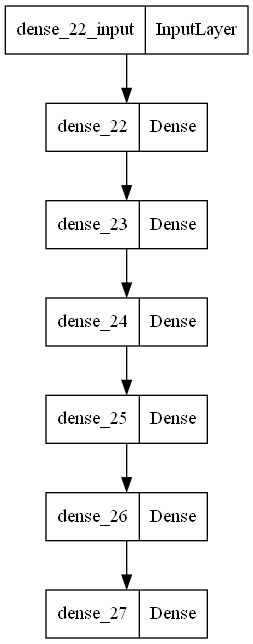

In [116]:
from keras.utils import plot_model

plot_model(model)

#### 최적화 알고리즘과 손실함수 지정: 모형의 학습 과정 설정

In [153]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

#### 모델 훈련

In [155]:
hist = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.4022 - accuracy: 0.8542 - val_loss: 0.4182 - val_accuracy: 0.8480
Epoch 2/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.3586 - accuracy: 0.8719 - val_loss: 0.3768 - val_accuracy: 0.8693
Epoch 3/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3301 - accuracy: 0.8792 - val_loss: 0.3473 - val_accuracy: 0.8787
Epoch 4/10
1500/1500 [==============================] - 41s 28ms/step - loss: 0.3157 - accuracy: 0.8844 - val_loss: 0.3218 - val_accuracy: 0.8860
Epoch 5/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2987 - accuracy: 0.8908 - val_loss: 0.3441 - val_accuracy: 0.8798
Epoch 6/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.2805 - accuracy: 0.8972 - val_loss: 0.3122 - val_accuracy: 0.8898
Epoch 7/10
1500/1500 [==============================] - 40s 26ms/step - loss: 0.2701 - accuracy: 0.9009 - val_loss: 0.3152 -

#### 손실과 정확도 그래프: 모델 성능 평가

In [156]:
df = pd.DataFrame(hist.history)

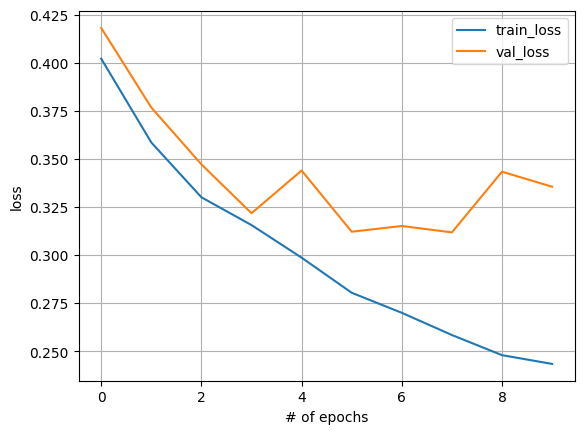

In [157]:
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss, label='val_loss')
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.legend()
plt.grid();

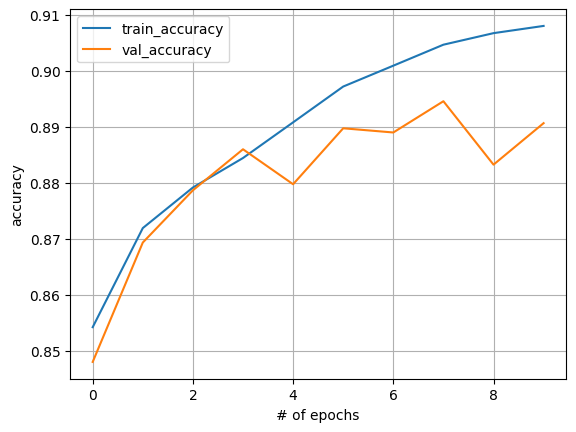

In [158]:
plt.plot(df.accuracy, label='train_accuracy')
plt.plot(df.val_accuracy, label='val_accuracy')
plt.xlabel('# of epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid();

In [159]:

y_pred_proba = model.predict(X_val)
y_pred_class = np.argmax(y_pred_proba, axis=-1)
print(y_pred_class[:10])
print(y_val[:10])

375/375 [==============================] - 3s 7ms/step
[5 4 5 2 1 5 0 1 2 6]
[5 4 5 2 1 5 0 1 2 0]


In [160]:
answer = np.argmax(model.predict(X_test_np), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [161]:
submission = pd.read_csv('./data/skyggle_Fashion_MNIST/submission.csv')
submission

,no,label
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
9995,9996,NaN
9996,9997,NaN
9997,9998,NaN
9998,9999,NaN


In [162]:
submission['label'] = answer
submission

,no,label
0,1,9
1,2,2
2,3,1
3,4,1
4,5,6
...,...,...
9995,9996,9
9996,9997,1
9997,9998,8
9998,9999,1


In [151]:
submission.to_csv('fashion_mnist.csv', index=False)

In [ ]:
#######################################